# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Breast Cancer Dataset
data_path = 'Breast_cancer_dataset.csv'
sample_df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

In [3]:
sample_df.drop(['Unnamed: 32','id'], axis=1, inplace=True)
sample_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. EDA
1. Is there missing data?
2. Check for distribution of numerical models.
3. Check for class Balance.




In [4]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
def check_missing_data(df):
    missing = df.isnull().sum()
    total = df.shape[0]
    missing_percent = (missing / total) * 100

    result = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_percent
    }).sort_values(by='Missing Count', ascending=False)

    return result


print(check_missing_data(sample_df))

# No missing data

                         Missing Count  Missing %
diagnosis                            0        0.0
radius_mean                          0        0.0
texture_mean                         0        0.0
perimeter_mean                       0        0.0
area_mean                            0        0.0
smoothness_mean                      0        0.0
compactness_mean                     0        0.0
concavity_mean                       0        0.0
concave points_mean                  0        0.0
symmetry_mean                        0        0.0
fractal_dimension_mean               0        0.0
radius_se                            0        0.0
texture_se                           0        0.0
perimeter_se                         0        0.0
area_se                              0        0.0
smoothness_se                        0        0.0
compactness_se                       0        0.0
concavity_se                         0        0.0
concave points_se                    0        0.0


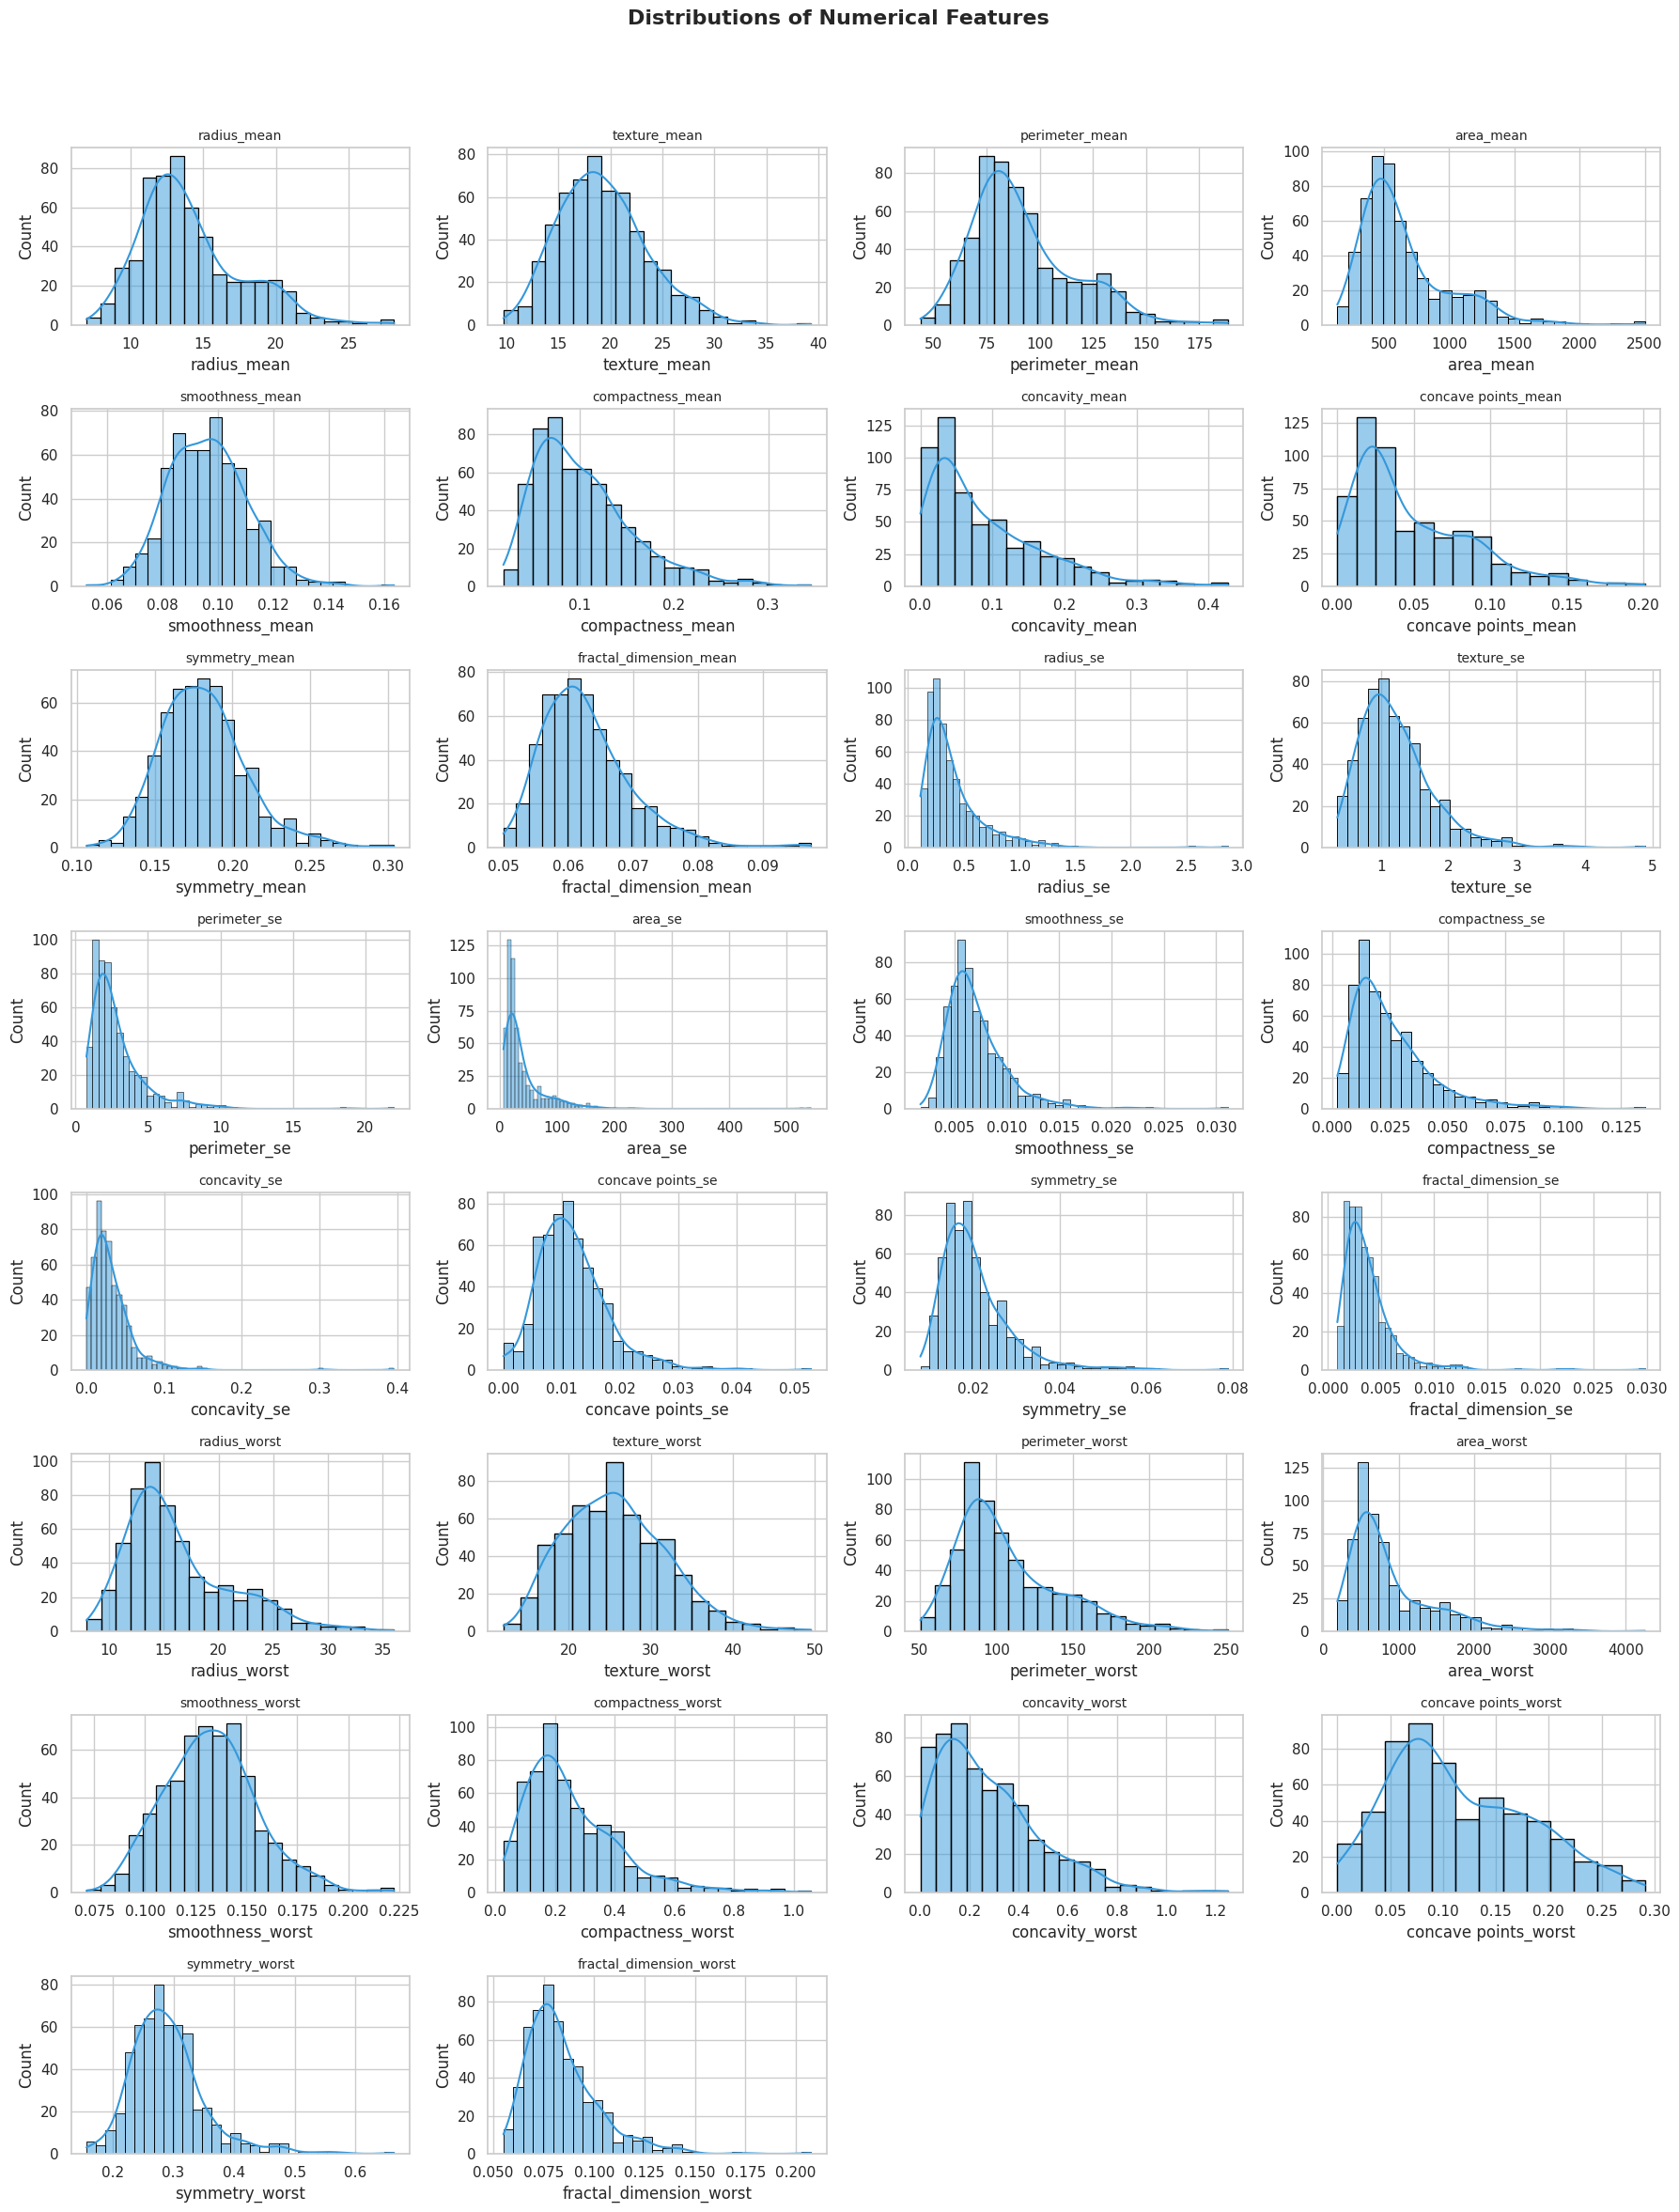

In [6]:
# Check for distribution of each numerical columns.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Optional: Clean inf values
sample_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sample_df.dropna(inplace=True)

# Plotting distribution of numerical columns
sns.set(style="whitegrid")

numeric_cols = sample_df.select_dtypes(include='number')
cols_per_row = 4
num_cols = len(numeric_cols.columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.histplot(data=sample_df, x=col, kde=True, ax=axes[i], color="#3498db", edgecolor="black")
    axes[i].set_title(col, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Distributions of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
def check_skewness(df, threshold=1.0, zero_range=0.05):

    skew_series = df.select_dtypes(include=['float64', 'int64']).apply(pd.Series.skew)
    skew_series = skew_series.sort_values(ascending=False)
    result = pd.DataFrame({'Feature': skew_series.index, 'Skewness': skew_series.values})

    print("\n⚠️ Highly skewed features (|skew| > {0}):".format(threshold))
    print(result[abs(result['Skewness']) > threshold])

    print("\n✅ Near-zero skewed features (|skew| < {0}):".format(zero_range))
    print(result[abs(result['Skewness']) < zero_range])

    return result

In [8]:
skewness_result = check_skewness(sample_df)


⚠️ Highly skewed features (|skew| > 1.0):
                    Feature  Skewness
0                   area_se  5.447186
1              concavity_se  5.110463
2      fractal_dimension_se  3.923969
3              perimeter_se  3.443615
4                 radius_se  3.088612
5             smoothness_se  2.314450
6               symmetry_se  2.195133
7            compactness_se  1.902221
8                area_worst  1.859373
9   fractal_dimension_worst  1.662579
10               texture_se  1.646444
11                area_mean  1.645732
12        compactness_worst  1.473555
13        concave points_se  1.444678
14           symmetry_worst  1.433928
15           concavity_mean  1.401180
16   fractal_dimension_mean  1.304489
17         compactness_mean  1.190123
18      concave points_mean  1.171180
19          concavity_worst  1.150237
20          perimeter_worst  1.128164
21             radius_worst  1.103115

✅ Near-zero skewed features (|skew| < 0.05):
Empty DataFrame
Columns: [Feature, Sk

Skewness < -0.5 = negatively skewed,

Skewness > 1 = positively skewed,

Skewness 0 = zero skewed



/tmp/ipython-input-4138901030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x='diagnosis', palette='Set2')


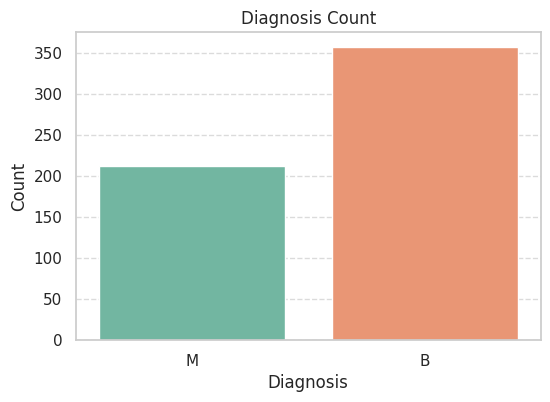

In [9]:
# Class balance check

plt.figure(figsize=(6, 4))
sns.countplot(data=sample_df, x='diagnosis', palette='Set2')

plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 3. Feature Selection

In [10]:
# function for each numerical column vs diagnosis.

def plot_numerical_vs_diagnosis(df, target='diagnosis', exclude_cols=None, kind='box', cols_per_row=3):
    if exclude_cols is None:
        exclude_cols = []

    # Filter numerical columns
    num_cols = df.select_dtypes(include='number').columns.difference(exclude_cols + [target])
    n = len(num_cols)
    nrows = (n + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(nrows, cols_per_row, figsize=(6 * cols_per_row, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        if kind == 'box':
            sns.boxplot(data=df, x=target, y=col, hue=target, ax=axes[i], palette='Set2')
        elif kind == 'violin':
            sns.violinplot(data=df, x=target, y=col, hue=target, ax=axes[i], palette='Set2')
        else:
            raise ValueError("kind must be 'box' or 'violin'")

        axes[i].set_title(f'{col} vs {target}', fontsize=10)
        axes[i].legend_.remove()  # Remove legend to avoid clutter

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

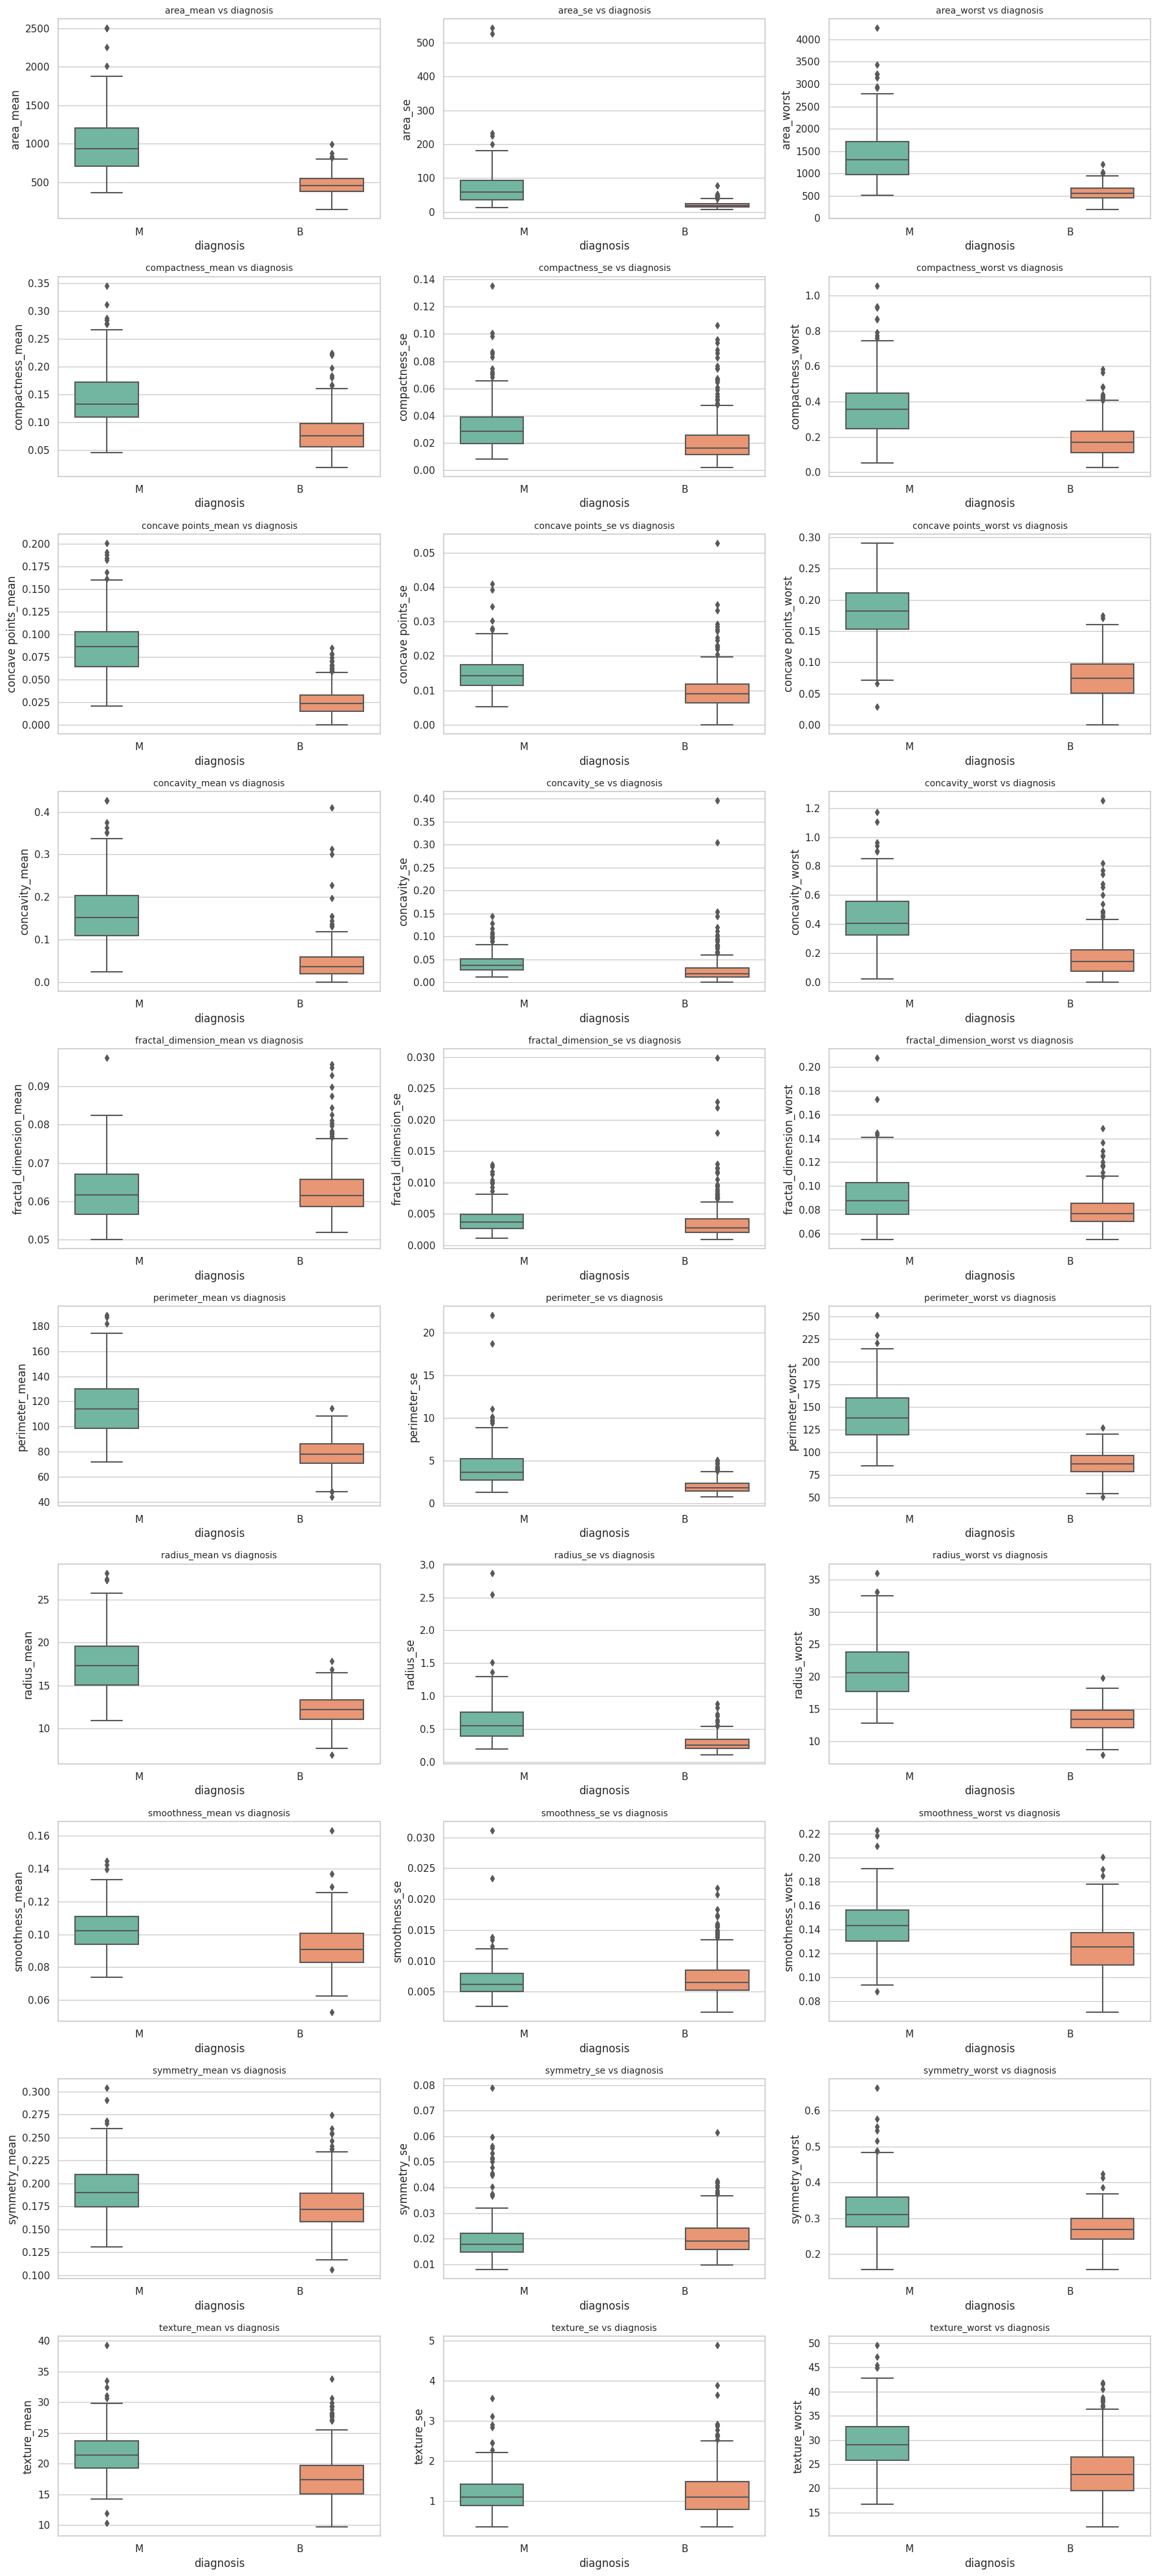

In [ ]:
plot_numerical_vs_diagnosis(sample_df, target='diagnosis', kind='box')

In [11]:
def plot_histograms_by_diagnosis(df, target='diagnosis', exclude_cols=None, bins=30, cols_per_row=3):
    import matplotlib.pyplot as plt
    import seaborn as sns

    if exclude_cols is None:
        exclude_cols = []

    # Select only numerical columns except the target and excluded ones
    num_cols = df.select_dtypes(include='number').columns.difference(exclude_cols + [target])
    n = len(num_cols)
    nrows = (n + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(nrows, cols_per_row, figsize=(6 * cols_per_row, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        for diagnosis in df[target].unique():
            sns.histplot(df[df[target] == diagnosis][col],
                         label=str(diagnosis),
                         bins=bins,
                         kde=False,
                         ax=axes[i],
                         element='step',
                         stat='density')

        axes[i].set_title(f'{col} distribution by {target}', fontsize=10)
        axes[i].legend(title=target)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

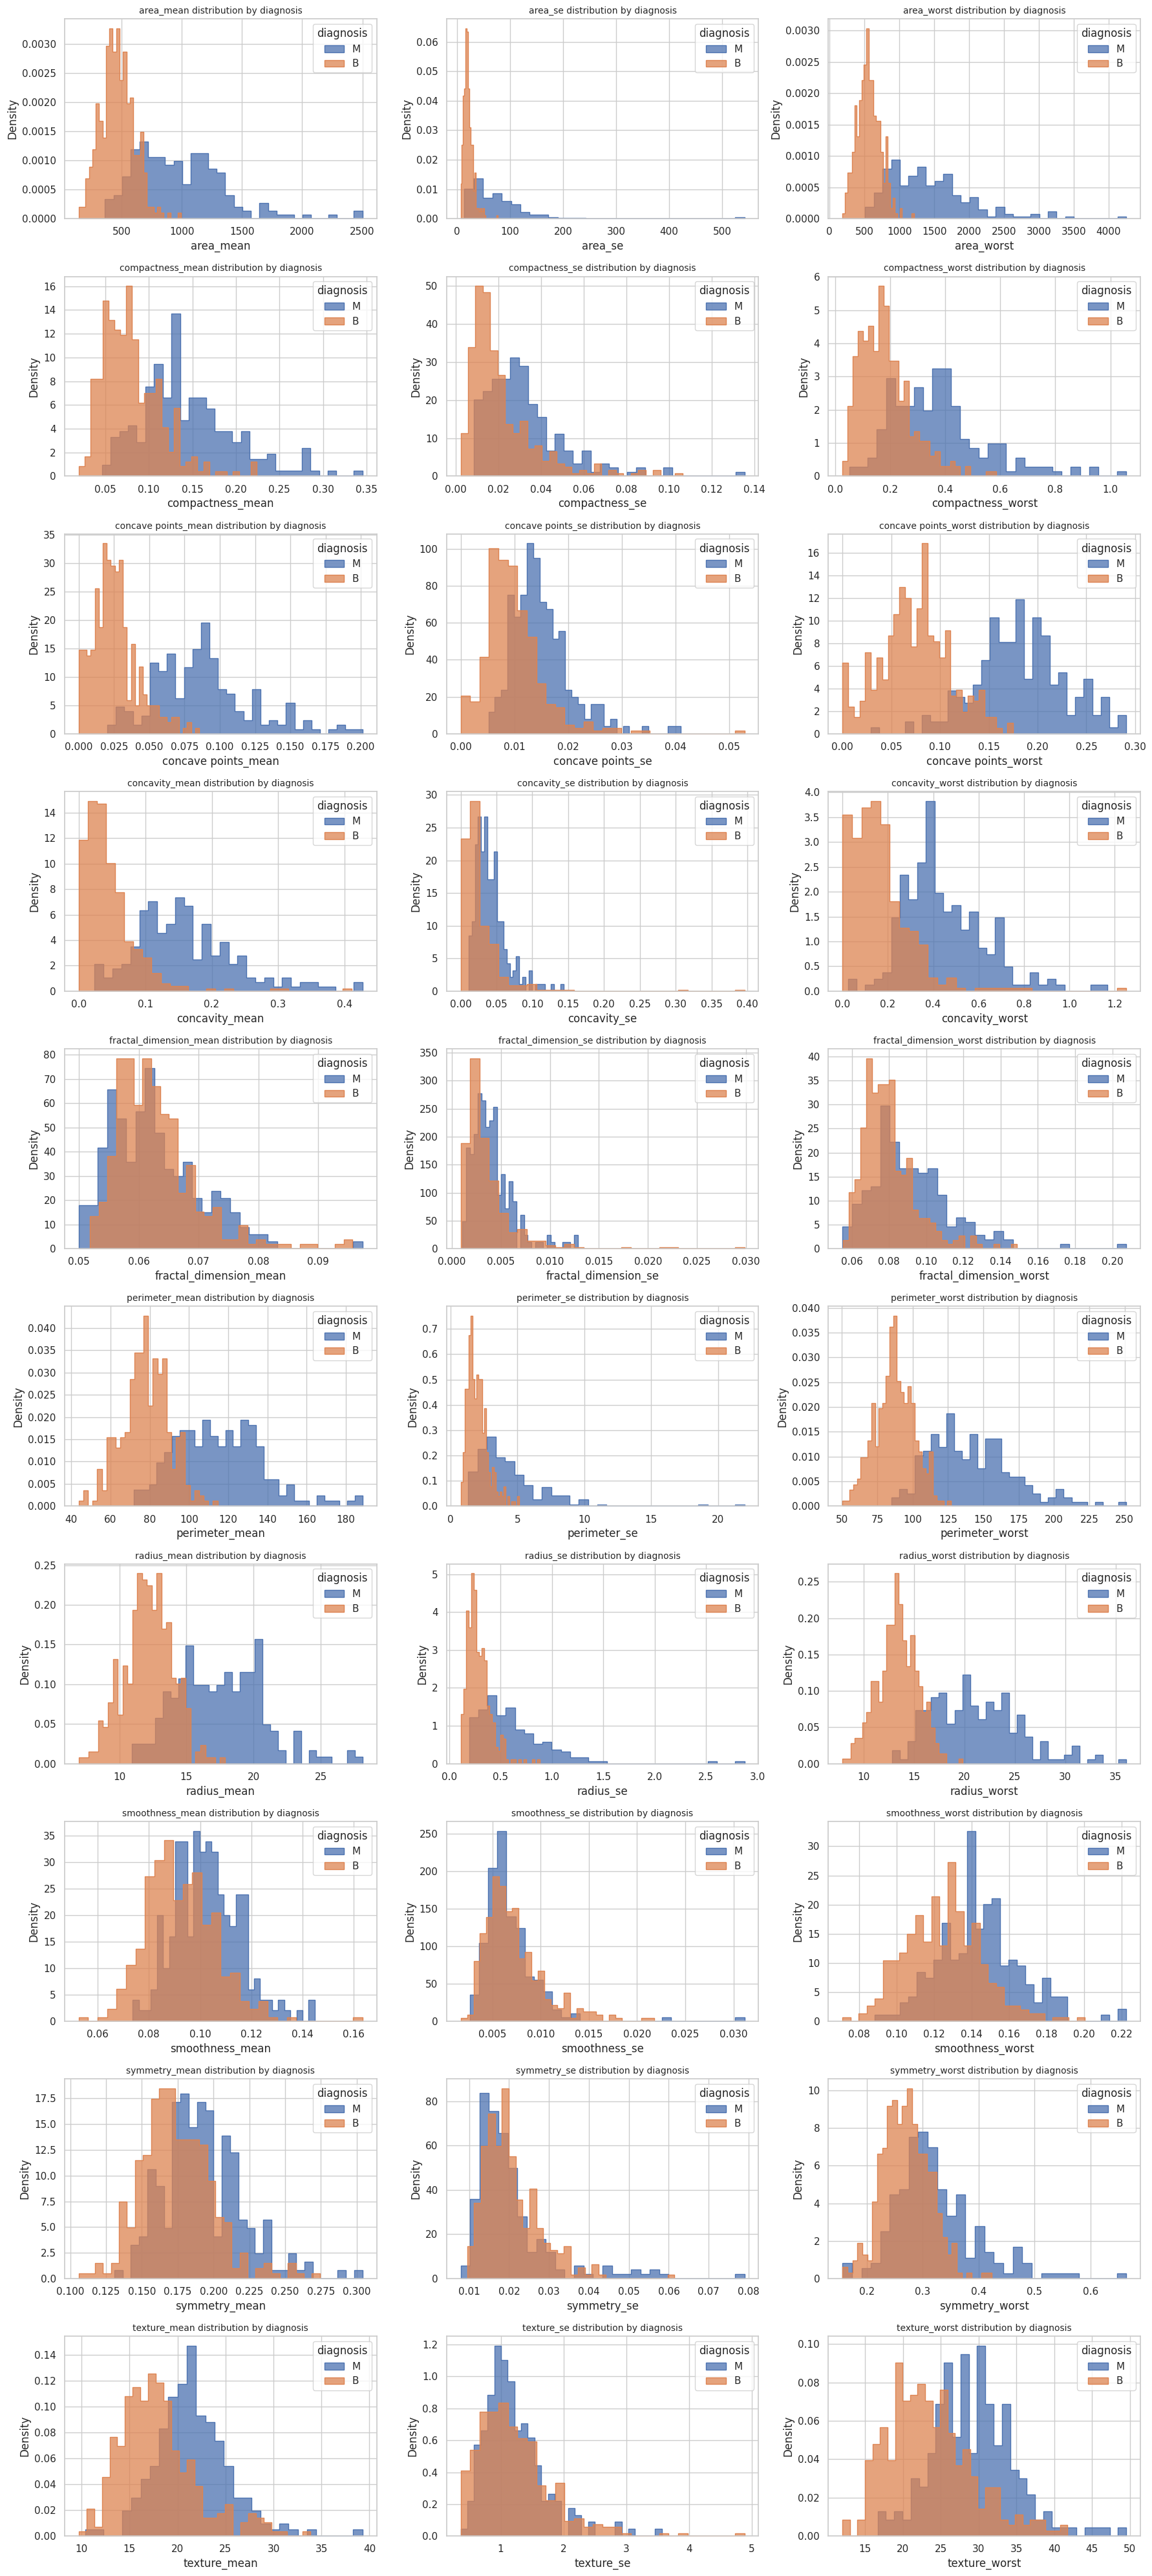

In [12]:
plot_histograms_by_diagnosis(sample_df)

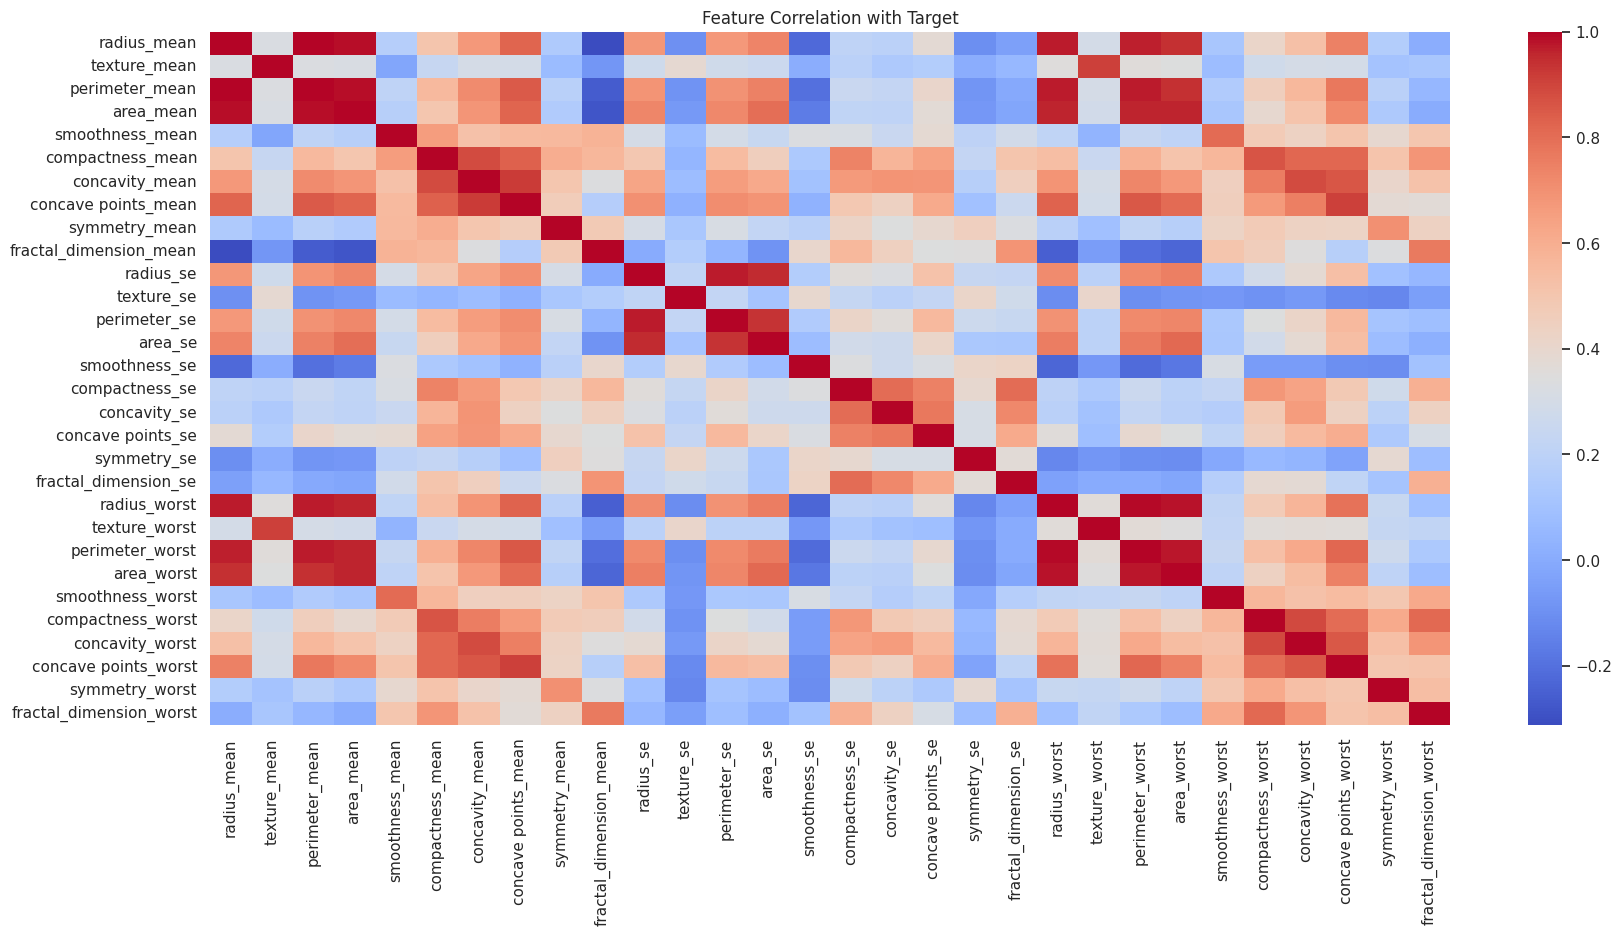

In [13]:
corr = sample_df.drop(columns=['diagnosis']).corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

In [14]:
# Get correlation matrix
corr_matrix = sample_df.drop(columns=['diagnosis']).corr().abs()

# Mask the upper triangle and diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
masked_corr = corr_matrix.mask(mask)

threshold = 0.8

high_corr_pairs = masked_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] >= threshold]

high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print(high_corr_pairs)

                   Feature 1            Feature 2  Correlation
1             perimeter_mean          radius_mean     0.997855
251          perimeter_worst         radius_worst     0.993708
3                  area_mean          radius_mean     0.987357
5                  area_mean       perimeter_mean     0.986507
273               area_worst         radius_worst     0.984015
275               area_worst      perimeter_worst     0.977578
76              perimeter_se            radius_se     0.972794
233          perimeter_worst       perimeter_mean     0.970387
190             radius_worst          radius_mean     0.969539
192             radius_worst       perimeter_mean     0.969476
231          perimeter_worst          radius_mean     0.965137
193             radius_worst            area_mean     0.962746
256               area_worst            area_mean     0.959213
234          perimeter_worst            area_mean     0.959120
88                   area_se            radius_se     0

In [15]:
feature_selected = sample_df[['radius_mean','radius_se','concave points_mean','concave points_worst','texture_worst','compactness_worst','smoothness_worst','fractal_dimension_se','diagnosis']]
feature_selected.head()

,radius_mean,radius_se,concave points_mean,concave points_worst,texture_worst,compactness_worst,smoothness_worst,fractal_dimension_se,diagnosis
0,17.99,1.0950,0.14710,0.2654,17.33,0.6656,0.1622,0.006193,M
1,20.57,0.5435,0.07017,0.1860,23.41,0.1866,0.1238,0.003532,M
2,19.69,0.7456,0.12790,0.2430,25.53,0.4245,0.1444,0.004571,M
3,11.42,0.4956,0.10520,0.2575,26.50,0.8663,0.2098,0.009208,M
4,20.29,0.7572,0.10430,0.1625,16.67,0.2050,0.1374,0.005115,M


# 4. Label Encoding


In [16]:
# M = 1 & B = 0
feature_selected = feature_selected.copy()
feature_selected.loc[:, 'diagnosis'] = feature_selected['diagnosis'].map({'M': 1, 'B': 0})


# 5. Standard Scaling


In [17]:
# Scale
from sklearn.preprocessing import StandardScaler

def scale_numerical_columns(df, target_col, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include='number').columns.difference([target_col] + exclude_cols)

    scaler = StandardScaler()

    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

    return df_scaled

df_scaled = scale_numerical_columns(feature_selected, target_col='diagnosis')

In [18]:
df_scaled.head()

,radius_mean,radius_se,concave points_mean,concave points_worst,texture_worst,compactness_worst,smoothness_worst,fractal_dimension_se,diagnosis
0,1.097064,2.489734,2.532475,2.296076,-1.359293,2.616665,1.307686,0.907083,1
1,1.829821,0.499255,0.548144,1.087084,-0.369203,-0.430444,-0.375612,-0.099444,1
2,1.579888,1.228676,2.037231,1.955000,-0.023974,1.082932,0.527407,0.293559,1
3,-0.768909,0.326373,1.451707,2.175786,0.133984,3.893397,3.394275,2.047511,1
4,1.750297,1.270543,1.428493,0.729259,-1.466770,-0.313395,0.220556,0.499328,1


# 6. Train test split + Model Building

🌲 Random Forest
1. Ensemble of decision trees (bagging).
2. Uses random subsets of data and features.
3. Robust to overfitting and outliers.
4. Good baseline model for tabular data.

⚡ AdaBoost
1. Sequential boosting of weak learners.
2. Focuses on previous misclassified samples.
3. Sensitive to noise/outliers.
4. Good for clean data with subtle patterns.

🚀 XGBoost
1. Optimized gradient boosting algorithm.
2. Fast, accurate, and regularized.
3. Best for performance with tuning effort.

📊 Logistic Regression
1. Linear model for binary classification.
2. Estimates probabilities using a sigmoid function.
3. Assumes a linear relationship between features and the log-odds of the target.
4. Simple, fast, and interpretable — great baseline for linearly separable data.

🎯 Support Vector Machine (SVM)
1. Finds the optimal hyperplane that maximizes the margin between classes.
2. Works well in high-dimensional spaces.
3. Can use different kernels (linear, RBF, polynomial) to capture nonlinear patterns.
4. Sensitive to scaling; may be slower on large datasets.

👟 K-Nearest Neighbors (KNN)
1. Instance-based learning — no training, just storing.
2. Classifies based on the majority label among k-nearest neighbors.
3. Simple and intuitive, but slow with large datasets.
4. Sensitive to feature scaling and irrelevant features.


In [19]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop(columns=['diagnosis'])
y = df_scaled['diagnosis']

# Split into train and test (e.g. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Convert target variables to integer type
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')


# Train models
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)
logreg_pred = logreg.predict(X_test)
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)

# Evaluation
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("AdaBoost:\n", classification_report(y_test, ada_pred))
print("XGBoost:\n", classification_report(y_test, xgb_pred))
print("Logistic Regression:\n", classification_report(y_test, logreg_pred))
print("SVM:\n", classification_report(y_test, svm_pred))
print("K-Nearest Neighbors:\n", classification_report(y_test, knn_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

AdaBoost:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:56:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


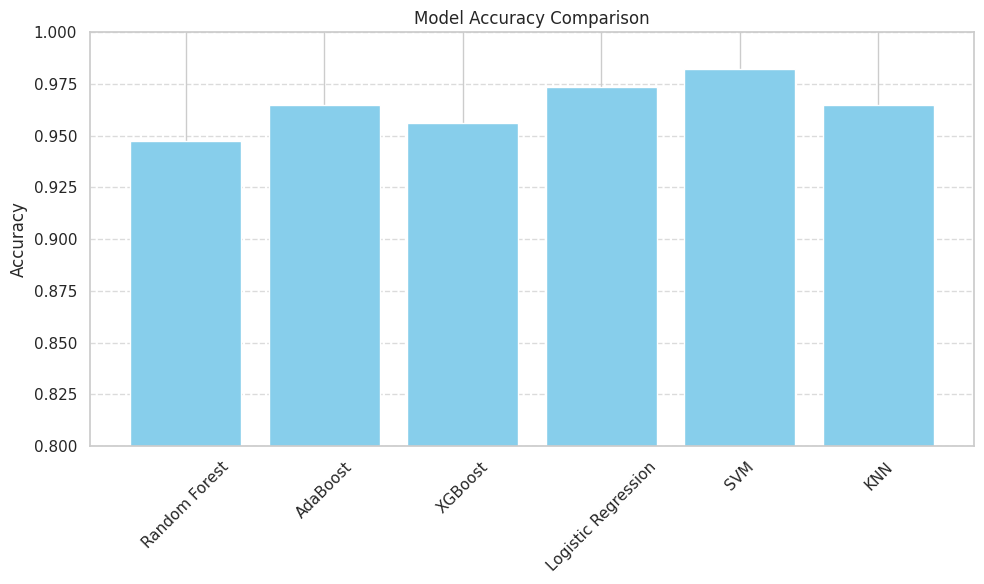

In [21]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
model_names = ['Random Forest', 'AdaBoost', 'XGBoost', 'Logistic Regression', 'SVM', 'KNN']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, ada_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, knn_pred)
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SVM able to predict diagnosis with 98% accuracy. Using features such as *'radius_mean', 'radius_se', 'concave points_mean', 'concave points_worst', 'texture_worst', 'compactness_worst', 'smoothness_worst', 'fractal_dimension_se', 'diagnosis'*.